In [4]:
#encoding=utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sa

In [5]:
full_data = pd.read_csv("titanic-data.csv")
full_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 列的描述
* Survived ：是否存活（0代表否 1代表是）
* Pclass:社会阶级（1代表上层阶级，2代表中层阶级，3代表的是底层阶级）
* Name：船上乘客的名字
* Sex：船上乘客的性别
* Age：船上乘客的年龄（可能会存在NaN）
* SibSp：乘客在船上的兄弟姐妹和配偶的数量
* Parch：乘客在船上的父母以及小孩的数量
* Ticket：乘客船票的编号
* Fare：乘客为船票支付的费用
* Cabin：乘客所在船舱的编号（可能存在NaN）


###### 对于乘客的存活率感兴趣，所以我们要对乘客的存活进行预测，所以原来数据集中的Survive这个特征我们需要把它移除，单独存放一个数据集

In [6]:
survived_data = full_data['Survived']
show_data = full_data.drop(['Survived'],axis=1)
show_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### 我们暂时不知道泰坦尼克号上的乘客是否存活，而我们要进行的预测存活的比例，如果乘客已经全部遇难了，那么我们的预测就是没有意义的，所以我们先要对所以的乘客是否遇难进行预测，才能更好的预测存活率

In [19]:
def survival_rate(data,prediction_data):
    
    if len(data) == len(prediction_data):
        return "要进行预测的数据概率是：{:.2f}%".format(((data == prediction_data).mean()) * 100)
    else:
        return "数据不匹配"
    
def prediction_no_survival_data(data):
    return pd.Series([0 for i,item in data.iterrows()])
    
no_survived_all = prediction_no_survival_data(show_data)

In [20]:
print survival_rate(survived_data,no_survived_all)

要进行预测的数据概率是：61.62%


##### 通过上面的数据可以知道不可能全部遇难,所以需要找出生存变化和数据中一些最重要的特征之间的关系。
# 问题1 是否乘客性别的特征会影响他的存活率？

In [ ]:
def filter_data(data, condition):
    field, op, value = condition.split(" ")
    
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else:
        raise Exception("Invalid error")
    
    data = data[matches].reset_index(drop = True)
    return data

def survival_stats(data, outcomes, key, filters = []):
    
    #检测行数据是否存在
    if key not in data.columns.values :
        print "'{}' 行数据不存在".format(key)
        return False

    # 合并表
    all_data = pd.concat([data, outcomes], axis = 1)
    
    # 过滤出我们想要的数据
    for condition in filters:
        all_data = filter_data(all_data, condition)

    all_data = all_data[[key, 'Survived']]
    
    # 创建图
    plt.figure(figsize=(8,6))

    if(key == 'Age' or key == 'Fare'):
        
        # 移除数据中的NaN
        all_data = all_data[~np.isnan(all_data[key])]
        
        # 分配比列
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        #划分每个柱子的区间
        if(key == 'Fare'):
            bins = np.arange(0, all_data['Fare'].max() + 20, 20)
        if(key == 'Age'):
            bins = np.arange(0, all_data['Age'].max() + 10, 10)
            
        #计算存活率
        nonsurv_vals = all_data[all_data['Survived'] == 0][key].reset_index(drop = True)
        surv_vals = all_data[all_data['Survived'] == 1][key].reset_index(drop = True)
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6,
                 color = 'red', label = 'Did not survive')
        plt.hist(surv_vals, bins = bins, alpha = 0.6,
                 color = 'blue', label = 'Survived')
    
        # 添加演示图
        plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
    
    else:
       
        if(key == 'Pclass'):
            values = np.arange(1,4)
        if(key == 'Parch' or key == 'SibSp'):
            values = np.arange(0,np.max(data[key]) + 1)
        if(key == 'Embarked'):
            values = ['C', 'Q', 'S']
        if(key == 'Sex'):
            values = ['male', 'female']

        frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Survived','NSurvived'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, \
                   len(all_data[(all_data['Survived'] == 1) & (all_data[key] == value)]), \
                   len(all_data[(all_data['Survived'] == 0) & (all_data[key] == value)])]

        bar_width = 0.4

        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['NSurvived'], width = bar_width, color = 'r')
            surv_bar = plt.bar(i, frame.loc[i]['Survived'], width = bar_width, color = 'b')

            plt.xticks(np.arange(len(frame)), values)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('Did not survive', 'Survived'), framealpha = 0.8)

    # 设置图的属性和显示图形
    plt.xlabel(key)
    plt.ylabel('Number of Passengers')
    plt.title('Passenger Survival Statistics With {} Feature'.format(key))
    plt.show()

In [ ]:
survival_stats(show_data, survived_data, 'Sex')

###### 通过上面的统计图可以看出  在泰坦尼克号沉没的时候，大多数的男性都遇难了，而另一边，大多数的女性都存活了下来，所以可以明显的看出性别对于乘客的存活率是很有影响力

In [ ]:
def prediction_survival_with_female(data):
    predictions = []
    for i,passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
        
survival_with_female = prediction_survival_with_female(full_data)

##### 对女性全部生存的概率进行预测

In [ ]:
print survival_rate(survived_data,survival_with_female)

##### 从预测的结果可以看出，如果只是女性生存的概率是非常的高，那么接下来会分析可以在此概率的基础上继续增加生存率的乘客特征，从之前的分析Sex状态图可以看出在男性乘客中有少数乘客是生存的，那么我们就分析这少部分男性乘客因为什么而得以生存，我们可以通过Age特征的状态图来观看

In [ ]:
survival_stats(show_data, survived_data, 'Age', ["Sex == 'male'"])

##### 通过图形可以直观的知道在船沉没的时候，大多数年纪小于10岁的男性都存活了下来，那么大于10岁的男孩都遇难了，我们接下来预测所有女性存活并且年纪小于10岁的男性的存活概率

In [8]:
def prediction_survival_mixing_characteristics(data):
    predictions = []
    for i,passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
        
survival_mixing = prediction_survival_mixing_characteristics(full_data)

###### 对女性存活并且年纪小于10岁的男性进行预测

In [9]:
print survival_rate(survived_data,survival_mixing)

要进行预测的数据概率是：79.35%


###### 可以看出我们的预测是正确的，小于10岁的男性对于我们的预测有一定的影响
# 问题2 乘客的社会地位的特征是否会影响到他的生存率


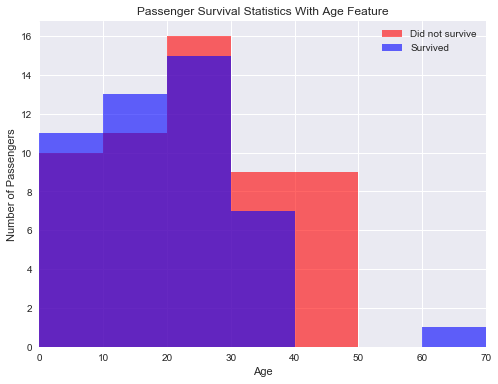

In [10]:
survival_stats(show_data, survived_data, 'Age',["Pclass == 3", "Sex == 'female'"])

##### 从上面可以看出女性在Plcass == 3的时候在40岁——60岁之间的存活率很低，所以survived = 0

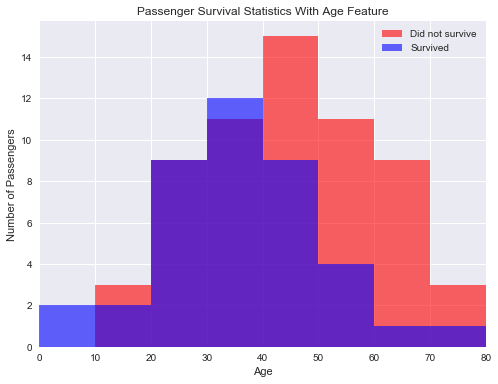

In [11]:
survival_stats(show_data, survived_data, 'Age',["Pclass == 1", "Sex == 'male'"])

###### 对于男性乘客来说，当他的社会地位很高并且年纪在40岁以下的时候，获救概率会比较高

In [12]:
def prediction_survival_pclass(data):
    predictions = []
    for i,passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            if passenger['Age'] > 40 and passenger['Age'] < 60 and passenger['Pclass'] == 3:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            elif passenger['Age'] < 40 and passenger['Pclass'] == 1:
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)

survival_pclass = prediction_survival_pclass(full_data)

###### 对社会地位比较高的乘客进行预测

In [13]:
print survival_rate(survived_data,survival_pclass)

要进行预测的数据概率是：80.25%


###### 通过上面的预测概率可以明确知道乘客的生存率与他们的社会地位有一定的关系
# 问题3 乘客的生存率是否和登船口有关系？

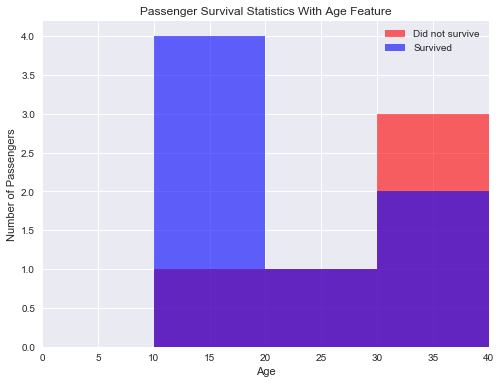

In [14]:
#女性乘客与登船口的关系图代码
survival_stats(show_data, survived_data, 'Age',["Embarked == 'Q'", "Sex == 'female'"])

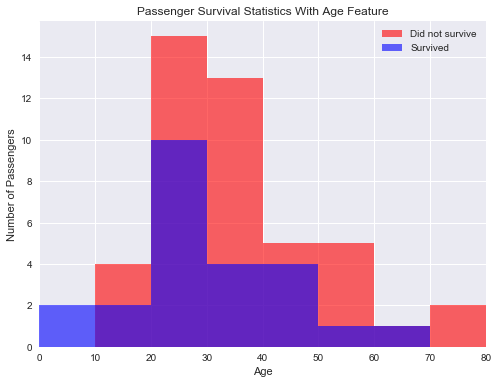

In [15]:
#男性乘客与登船口的关系图代码
survival_stats(show_data, survived_data, 'Age',["Embarked == 'C'", "Sex == 'male'"])

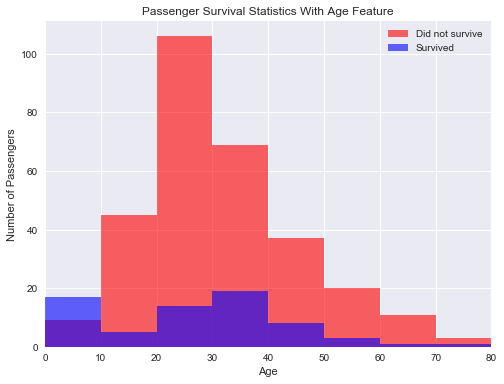

In [16]:
survival_stats(show_data, survived_data, 'Age',["Embarked == 'S'", "Sex == 'male'"])

##### 通过乘客与登船口的关系图可以明确的知道女性乘客在Q登船口的生存率明显很低，而男性乘客在年纪小于10岁并且在C，S登船口的生存率比较高，可以通过下面的代码来预测乘客生存率和登船口的关系概率

In [17]:
def prediction_survival_embarked(data):
    predictions = []
    for i,passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            if passenger['Age'] > 40 and passenger['Age'] < 60 and passenger['Pclass'] == 3:
                predictions.append(0)
            elif passenger['Age'] > 30 and passenger['Age'] < 40 and passenger['Embarked'] == 'Q':
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            elif passenger['Age'] < 40 and passenger['Pclass'] == 1:
                predictions.append(1)
            elif passenger['Age'] < 10 and (passenger['Embarked'] == 'C' or passenger['Embarked'] == 'S'):
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)

survival_embarked = prediction_survival_embarked(full_data)

In [18]:
print survival_rate(survived_data,survival_embarked)

要进行预测的数据概率是：80.47%


# 结论
###### 根据我们最后的预测概率可以得出乘客的获救率相关因素：
* 性别： 女性高于男性
* 年龄： 儿童大于成人，成年人略高于老年人
* 舱位： 一等舱大于其他舱位